# Questão 1

In [6]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
n = 10000    # tamanho da amostra
l = 1        # lado do quadrado
r = 1/2      # raio do círculo
Nc = 0       # Número de pontos dentro do círculo
inside = []  # armazena um booleano (True se o ponto está dentro do círculo)

# gerando n números aleatórios X e Y
x = np.random.ranf(n)
y = np.random.ranf(n)

# Conta o número de pontos dentro do círculo.
for x_i,y_i in zip(x,y):
    
    # checa se o ponto (X,Y) está dentro do círculo
    if x_i**2 + y_i**2 <= 1.0:
        Nc += 1
        inside.append(True)
    else:
        inside.append(False)

# Nc / Np = pi / 4
pi = (float(Nc) / n) * 4

print('Estimativa de Monte Carlo para pi:', pi)

Estimativa de Monte Carlo para pi: 3.152


In [7]:
np.mean(pis)

3.1406859999999996

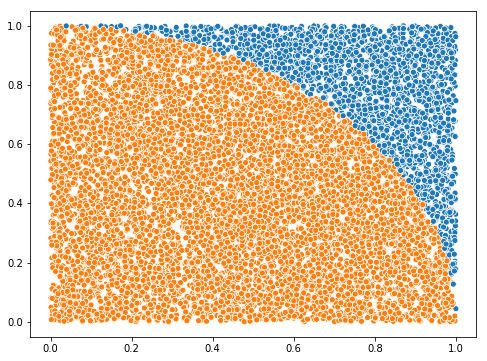

In [10]:
#plot
plt.figure(figsize=(8,6))
sns.scatterplot(x = x, y = y, hue=inside, legend=False)

#plt.savefig('Sim_q1.jpg')

# Questão 2

In [62]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def BoxMuller(n):
    # geramos variáveis em pares
    n_pares = int(np.ceil(n/2))
    
    R = np.sqrt(-2 * np.log(np.random.ranf(n_pares)))     # simulando R
    theta = np.pi * 2 * np.random.ranf(n_pares)           # simulando theta
    
    X_1 = R * np.cos(theta)  # amostra x_1
    X_2 = R * np.sin(theta)  # amostra x_2
    
    return X_1, X_2

n = 10000
x_1, x_2 = BoxMuller(n*2)

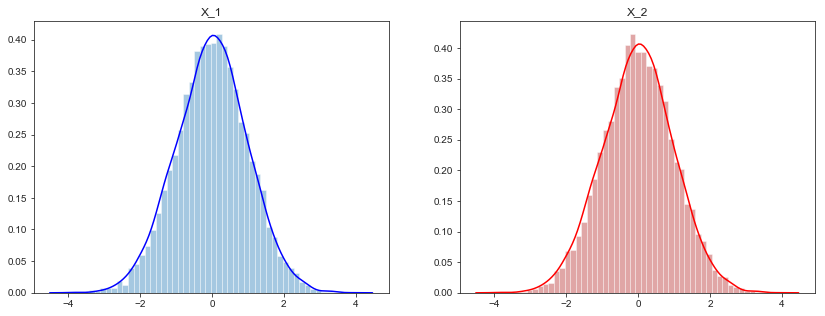

<Figure size 720x432 with 0 Axes>

In [137]:
n = 10000
x_1, x_2 = BoxMuller(n*2)

sns.set_style('ticks')

fig, ax = plt.subplots(1,2, figsize=(14,5))

# fazendo histograma
plt.figure(figsize=(10,6))
sns.distplot(x_1, kde=False, norm_hist=True, ax=ax[0])
sns.distplot(x_2, kde=False, norm_hist=True, ax=ax[1], color='firebrick')

normal = np.random.standard_normal(n)
# plota uma "verdadeira" Normal Padrão
sns.kdeplot(normal, ax=ax[0], color='blue')
sns.kdeplot(normal, ax=ax[1], color='red')

ax[0].set_title('X_1')
ax[1].set_title('X_2')

fig.savefig('sim_q2.jpg')

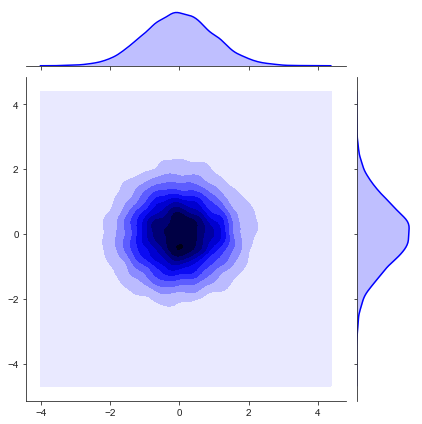

In [132]:
sns.jointplot(x_1, x_2, kind='kde', color='blue')

plt.savefig('sim_q2_1.jpg')

# Questão 3

In [158]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
sns.set_style('white')

In [145]:
theta_verdadeiro = 0.7

# definindo funcao que retorna as probabilidades da multinomial 
def pMultinomial(theta):
    return [1/2 + theta/4, (1/4) * (1 - theta), (1/4) * (1 - theta), theta/4]

def logVerossimilhanca(theta):
    #np.random.seed(17)
    # amostrando de uma multinomial
    sample = np.random.multinomial(100, pMultinomial(theta_verdadeiro), size=1)
    sample = sample[0]
    
    return sample[0]*np.log(2+theta) + (sample[1]+sample[2])*np.log(1 - theta) + sample[3]*np.log(theta)

In [146]:
# avalia a log_verossimilhança em um grid
grid = np.linspace(0,1,10000)
ver = list(map(logVerossimilhanca, grid[1:]))

max_ver = max(ver)  # máx. verossimilhança

# encontra o estimador de máxima verossimilhança
max_theta = 0
for i in range(len(ver)):
    if ver[i] == max_ver:
        max_theta = grid[i]

print('Maximum Likelihood Estimation:', max_theta)

Maximum Likelihood Estimation: 0.8887888788878888


/home/franklin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


In [279]:
# Aplicando rejection sampling

N = 1000                            # numero de pontos que queremos amostrar
n_aceito = 0                        # numero de pontos que foram aceitos
amostras = []                       # pontos amostrados
total_amostras = 0                  # total de pontos que foram amostrados
n_amostras_ac = np.repeat(0,N)      # numero de pontos amostrados ate a aceitacao 

while n_aceito < N:
    total_amostras += 1 
    n_amostras_ac[n_aceito] = n_amostras_ac[n_aceito] + 1
    x = np.random.ranf()
    log_alfa = logVerossimilhanca(x) - max_ver
    
    if np.log(np.random.ranf()) < log_alfa:
        n_aceito += 1
        amostras.append(x)

print('Nº de amostras aceitas:', n_aceito)
print('Total de amostras retiradas:', total_amostras)

Nº de amostras aceitas: 1000
Total de amostras retiradas: 51712718


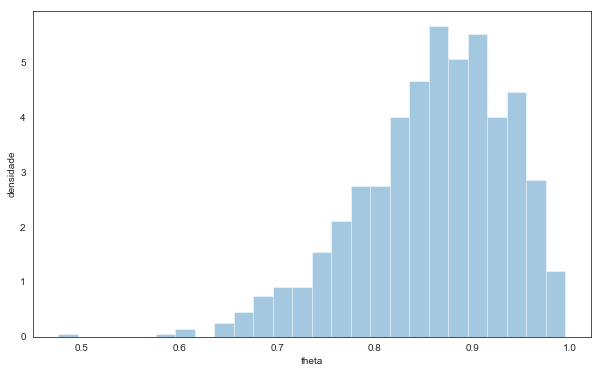

In [280]:
# fazendo histograma das amostras
plt.figure(figsize=(10,6))
sns.distplot(amostras, kde=False, norm_hist=True)

plt.xlabel('theta')
plt.ylabel('densidade')

plt.savefig('sim_q3.jpg')

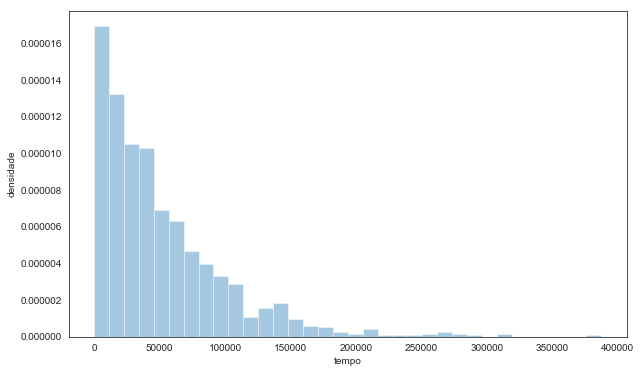

In [281]:
# fazendo histograma dos tempos de "espera"
plt.figure(figsize=(10,6))
sns.distplot(n_amostras_ac, kde=False, norm_hist=True)

plt.xlabel('tempo')
plt.ylabel('densidade')

plt.savefig('sim_q3_1.jpg')

# Questão 4

In [243]:
# função para amostrar de uma mistura de 2 gaussianas
def mistura_2gaussianas(w1, mu1, sigma1, mu2, sigma2):
    w2 = 1-w1
    r = np.random.randint(0,2)
    random_number = w1*r + w2*(1-r)
    
    if random_number == w1:
        a = np.random.normal(mu1, sigma1)
    elif random_number == w2:
        a = np.random.normal(mu2, sigma2)
    
    return a

N = 10000         # tamanho da amostra
amostras = []     # pontos sorteados

# fazendo a amostragem
for i in range(N+1):
    amostras.append(mistura_2gaussianas(0.41, 4.5, 1, 1.2, 1))

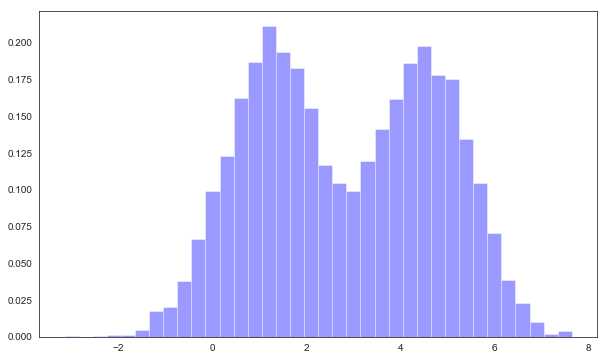

In [246]:
# fazendo histograma dos tempos de "espera"
plt.figure(figsize=(10,6))
sns.distplot(amostras, kde=False, norm_hist=True, color='blue')

plt.ylabel('densidade')

plt.savefig('sim-q4.jpg')

# Questão 5

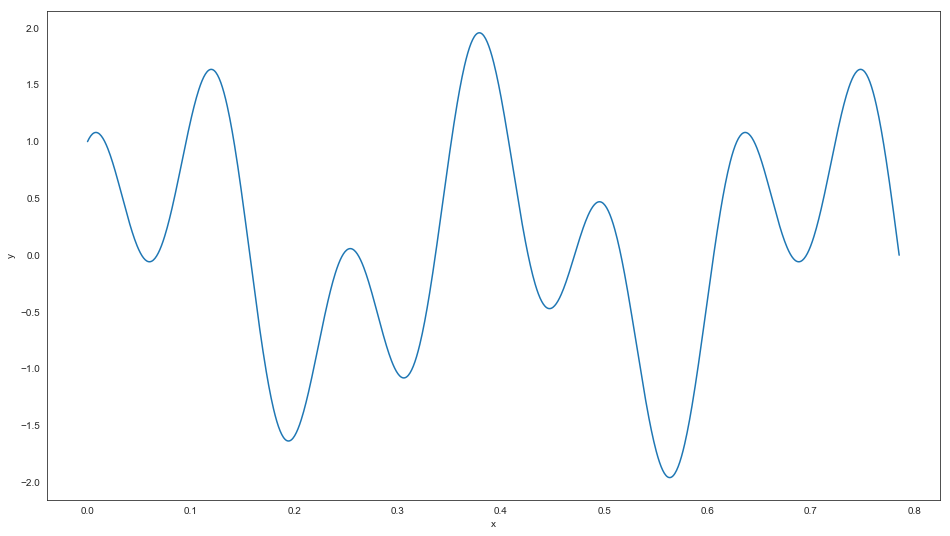

In [267]:
def h(x):
    return np.cos(50*x) + np.sin(20*x)

grid = np.linspace(0,np.pi/4,1000)
y = list(map(h, grid))


plt.figure(figsize=(16,9))
sns.lineplot(y=y, x=grid)


plt.xlabel('x')
plt.ylabel('y')
plt.savefig('sim_q5_1.jpg')

### item 1

In [269]:
def H(x):
    return x/2 + np.sin(100*x)/200 + 2* (np.cos(30*x)/60 -np.cos(70*x)/140) + x/2 -np.sin(40*x)/80

In [270]:
integral = H(1) - H(0)
print('Valor verdadeiro da integral:', integral)

Valor verdadeiro da integral: 0.9652009360501459


### item 2

In [273]:
N = 1000         # número de pontos
Nrep = 1000      # número de repeticoes
erros = []       # lista de erros

for i in range(Nrep):  
    u = np.random.ranf()
    w = h(u)
    erros.append(np.abs(np.mean(w) - integral)/integral)

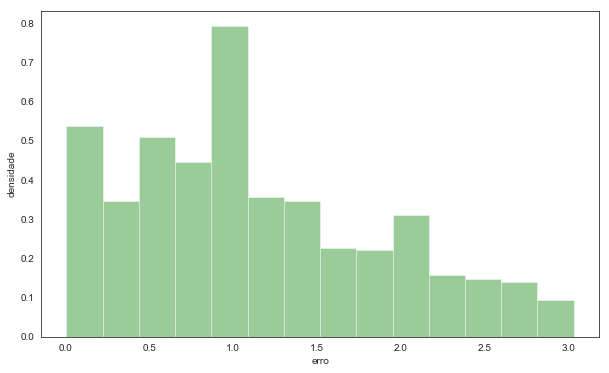

In [278]:
# fazendo histograma dos erros
plt.figure(figsize=(10,6))
sns.distplot(erros, kde=False, norm_hist=True, color='green')

plt.ylabel('densidade')
plt.xlabel('erro')

plt.savefig('sim_q5_2.jpg')

### item 3

### item 4